<a href="https://colab.research.google.com/github/Bikomwangi/Week.13.Project/blob/main/Part_2_R_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

- Perform clustering stating insights drawn the analysis and visualizations.
- Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis.

# The Metrics for Success

# The Context

In this analysis, the goal is to use past retail data to understand customers' behavior and learn the characteristics of various customer groups for a retail company in Russia. Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.


# Loading libraries for clustering

In [2]:
library(tidyverse) #data manipulating and visualization
install.packages("factoextra")#clustering algorithms
library(factoextra)#clustering visaulizations
install.packages("cluster")
library(cluster)
library(ggplot2)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Loading and exploring the Dataset

In [3]:
#loading the dataset
data <- read_csv("http://bit.ly/EcommerceCustomersDataset")



── Column specification ────────────────────────────────────────────────────────
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)




In [4]:
# checking the columns
str(data)


tibble [12,330 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Administrative         : num [1:12330] 0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num [1:12330] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num [1:12330] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num [1:12330] 1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num [1:12330] 0 64 -1 2.67 627.5 ...
 $ BounceRates            : num [1:12330] 0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num [1:12330] 0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num [1:12330] 0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr [1:12330] "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : num [1:12330] 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : num [1:12330] 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : num [1:12330] 1 1 9 2 1 1 3 1 2 1 

In [4]:
#checking the shape of the dataset
dim(data)

[1] 12330    18

In [5]:
# checking the top 6 rows
head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [6]:
# viewing a statistical summary of the columns
summary(data)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

# Data Cleaning and manipulation

In [5]:
# data cleaning process
# checking the missing values
length(which(is.na(data)))


[1] 112

In [6]:
#no of complete cases in the dataset
sum((complete.cases(data)==T))

[1] 12316

In [7]:
#is it a big percentage with compared to the data
(12330-12316)/(12330)

[1] 0.001135442

In [8]:
#since missing values are a small fraction letsomit them
data=na.omit(data)

In [9]:
#checking if the data types are correct
str(data)

tibble [12,316 × 18] (S3: tbl_df/tbl/data.frame)
 $ Administrative         : num [1:12316] 0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num [1:12316] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num [1:12316] 0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num [1:12316] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num [1:12316] 1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num [1:12316] 0 64 -1 2.67 627.5 ...
 $ BounceRates            : num [1:12316] 0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num [1:12316] 0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num [1:12316] 0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num [1:12316] 0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr [1:12316] "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : num [1:12316] 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : num [1:12316] 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : num [1:12316] 1 1 9 2 1 1 3 1 2 1 ...
 $ Traff

# EDA

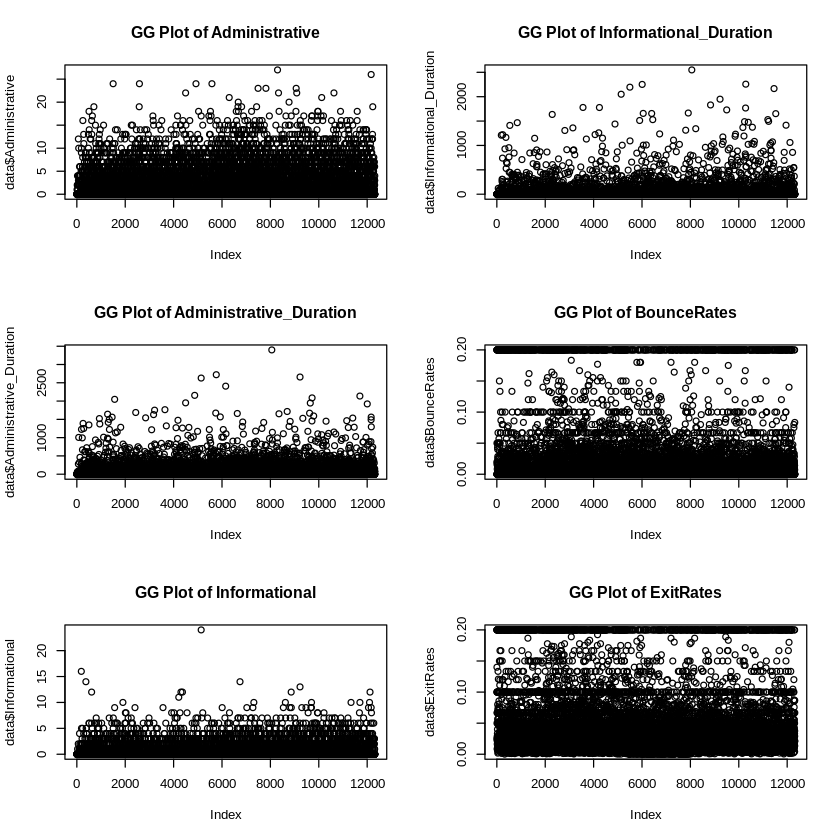

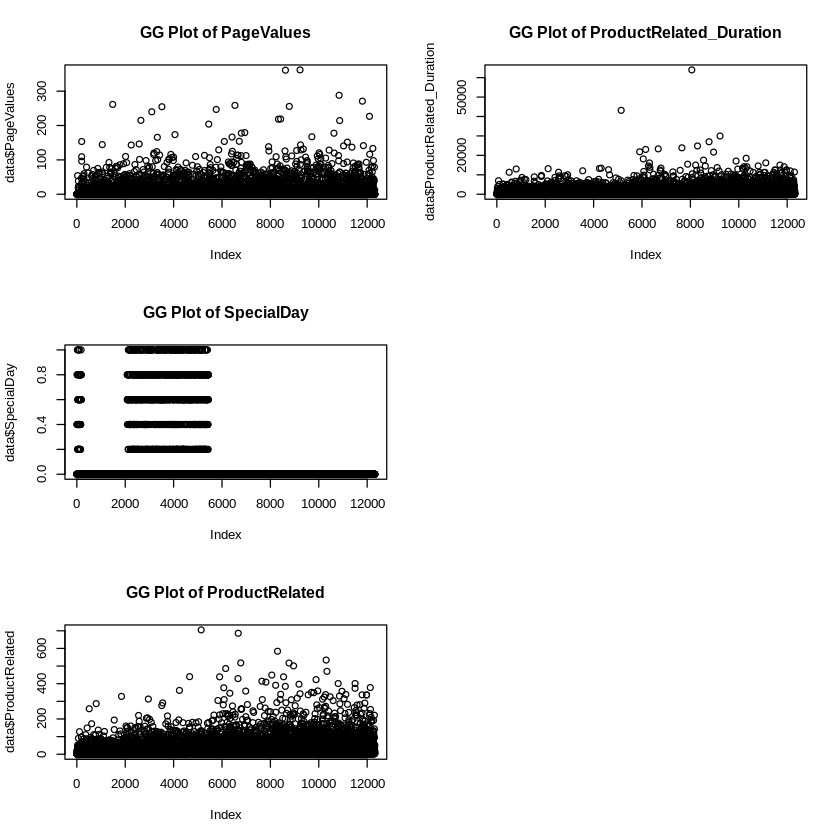

In [12]:
# plotting the numeric variables
library(ggplot2)
par(mfcol=c(3,2))
plot(data$Administrative,main="GG Plot of Administrative")
plot(data$Administrative_Duration,main="GG Plot of Administrative_Duration")
plot(data$Informational,main="GG Plot of Informational")
plot(data$Informational_Duration,main="GG Plot of Informational_Duration")
plot(data$BounceRates,main="GG Plot of BounceRates")
plot(data$ExitRates,main="GG Plot of ExitRates")
plot(data$PageValues,main="GG Plot of PageValues")
plot(data$SpecialDay,main="GG Plot of SpecialDay")
plot(data$ProductRelated,main="GG Plot of ProductRelated")
plot(data$ProductRelated_Duration, main="GG Plot of ProductRelated_Duration")

In [10]:
# saving variable as factors
factor1<-factor(data$Revenue)
factor2<-factor(data$Weekend)
factor3<-factor(data$VisitorType)
factor4<-factor(data$TrafficType)
factor5<-factor(data$Region)
factor6<-factor(data$Browser)
factor7<-factor(data$OperatingSystems)
factor8<-factor(data$Month)

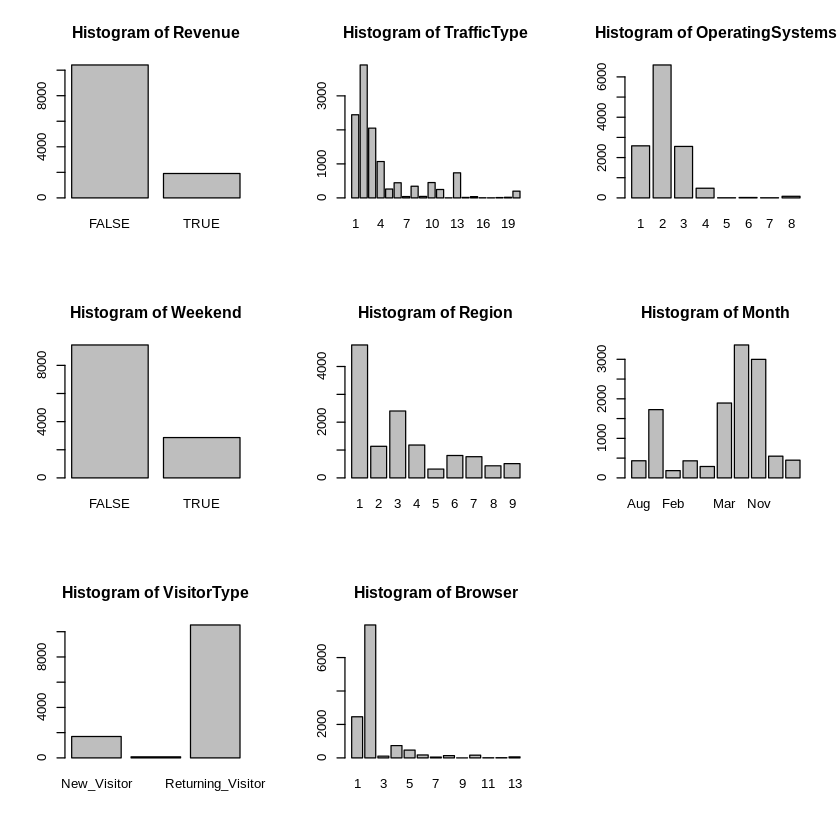

In [14]:
# plotting histogram of the factors above
knitr::opts_chunk$set(fig.width=12, fig.height=8) 
par(mfcol=c(3,3))
plot(factor1,main="Histogram of Revenue")
plot(factor2,main="Histogram of Weekend")
plot(factor3,main="Histogram of VisitorType")
plot(factor4,main="Histogram of TrafficType")
plot(factor5,main="Histogram of Region")
plot(factor6,main="Histogram of Browser")
plot(factor7,main="Histogram of OperatingSystems")
plot(factor8,main="Histogram of Month")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.00000000,0.60146617,0.37678191,0.25575699,0.43083240,0.37364696,-0.22347356,-0.3161922,0.09877121,-0.09505368
Administrative_Duration,0.60146617,1.00000000,0.30264662,0.23795860,0.28886939,0.35523845,-0.14412830,-0.2056184,0.06746252,-0.07347232
Informational,0.37678191,0.30264662,1.00000000,0.61896515,0.37409771,0.38744622,-0.11607084,-0.1635385,0.04853883,-0.04832830
Informational_Duration,0.25575699,0.23795860,0.61896515,1.00000000,0.27996566,0.34730003,-0.07407670,-0.1052046,0.03078687,-0.03065825
ProductRelated,0.43083240,0.28886939,0.37409771,0.27996566,1.00000000,0.86086816,-0.20446907,-0.2922194,0.05606696,-0.02419026
ProductRelated_Duration,0.37364696,0.35523845,0.38744622,0.34730003,0.86086816,1.00000000,-0.18440884,-0.2516447,0.05262267,-0.03659783
BounceRates,-0.22347356,-0.14412830,-0.11607084,-0.07407670,-0.20446907,-0.18440884,1.00000000,0.9134364,-0.11935658,0.07308778
ExitRates,-0.31619224,-0.20561843,-0.16353853,-0.10520464,-0.29221942,-0.25164475,0.91343642,1.0000000,-0.17439706,0.10289884
PageValues,0.09877121,0.06746252,0.04853883,0.03078687,0.05606696,0.05262267,-0.11935658,-0.1743971,1.00000000,-0.06365971
SpecialDay,-0.09505368,-0.07347232,-0.04832830,-0.03065825,-0.02419026,-0.03659783,0.07308778,0.1028988,-0.06365971,1.00000000


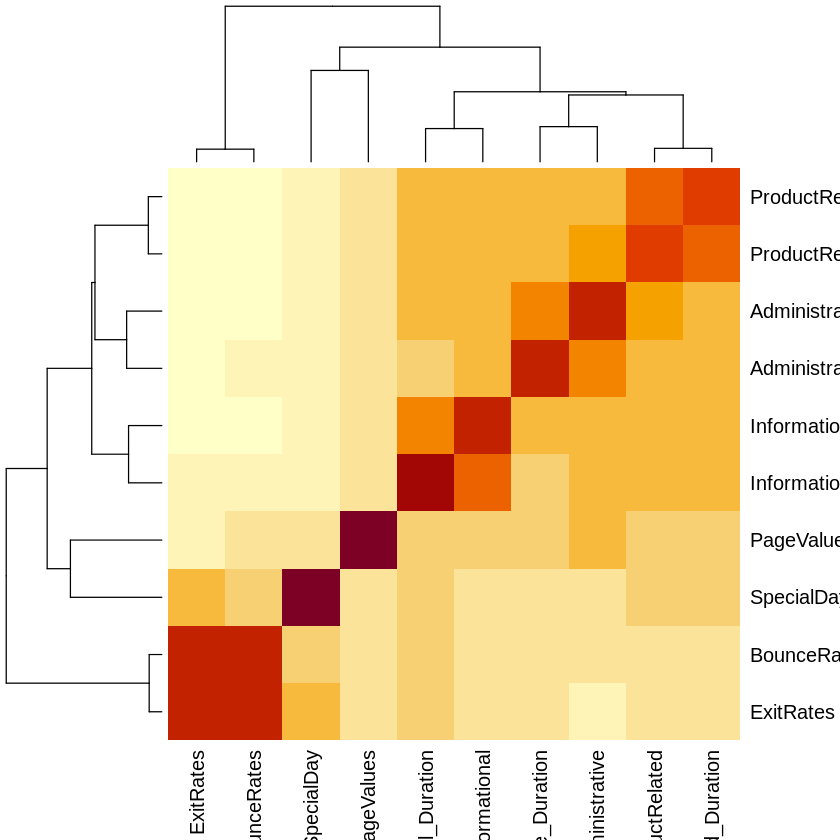

In [16]:
# checking correlation
# correlation matrix
(corrm<-cor(data[1:10],method="pearson"))
heatmap(corrm)


## Standardizing the data

In [15]:
# standardizing the data
# removing column 11 & 15
data=data[,-11]
data=data[,-15]
# scaling the data to make the variables comparable
data=data[complete.cases(data),]
data<-scale(data)
summary(data)

 Administrative    Administrative_Duration Informational    
 Min.   :-0.6976   Min.   :-0.46311        Min.   :-0.3966  
 1st Qu.:-0.6976   1st Qu.:-0.45746        1st Qu.:-0.3966  
 Median :-0.3966   Median :-0.41222        Median :-0.3966  
 Mean   : 0.0000   Mean   : 0.00000        Mean   : 0.0000  
 3rd Qu.: 0.5063   3rd Qu.: 0.07121        3rd Qu.:-0.3966  
 Max.   : 7.4282   Max.   :18.75967        Max.   :18.4906  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2521        Min.   :-0.7139   Min.   :-0.6253        
 1st Qu.:-0.2450        1st Qu.:-0.5566   1st Qu.:-0.5281        
 Median :-0.2450        Median :-0.3094   Median :-0.3115        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2450        3rd Qu.: 0.1402   3rd Qu.: 0.1413        
 Max.   :17.8581        Max.   :15.1322   Max.   :32.7927        
  BounceRates        ExitRates         PageValues        SpecialDay    
 Min.   :-0.4574   Min.   :-0.8862   Mi

# K- means Clustering

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


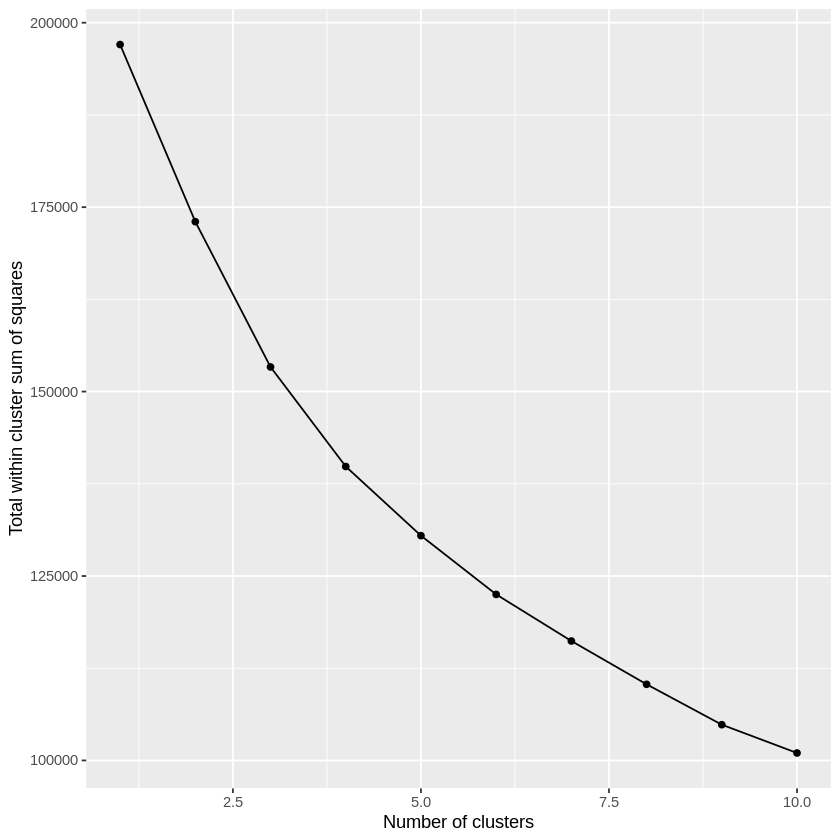

In [16]:
# using elbow plot an optimal number of clusters
elbow_data<-NULL 
for (i in 1:10) {
clustering<-kmeans(data,centers=i,nstart=30)
elbow_data<-rbind(elbow_data,data.frame(total_ss = clustering$tot.withinss,k=i))
}
ggplot(data=elbow_data,aes(x=k,y=total_ss))+geom_line()+geom_point()+
ylab("Total within cluster sum of squares")+xlab("Number of clusters")

according to the graph above K can either be 3 or 4

In [17]:
# trying with k=4
k<-4
clustering<-kmeans(data, centers=k,nstart=30)
data1<-cbind(data, clustering$cluster)
summary(data1)

 Administrative    Administrative_Duration Informational    
 Min.   :-0.6976   Min.   :-0.46311        Min.   :-0.3966  
 1st Qu.:-0.6976   1st Qu.:-0.45746        1st Qu.:-0.3966  
 Median :-0.3966   Median :-0.41222        Median :-0.3966  
 Mean   : 0.0000   Mean   : 0.00000        Mean   : 0.0000  
 3rd Qu.: 0.5063   3rd Qu.: 0.07121        3rd Qu.:-0.3966  
 Max.   : 7.4282   Max.   :18.75967        Max.   :18.4906  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2521        Min.   :-0.7139   Min.   :-0.6253        
 1st Qu.:-0.2450        1st Qu.:-0.5566   1st Qu.:-0.5281        
 Median :-0.2450        Median :-0.3094   Median :-0.3115        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2450        3rd Qu.: 0.1402   3rd Qu.: 0.1413        
 Max.   :17.8581        Max.   :15.1322   Max.   :32.7927        
  BounceRates        ExitRates         PageValues        SpecialDay    
 Min.   :-0.4574   Min.   :-0.8862   Mi


   1    2    3    4 
1012 8363 1685 1256 

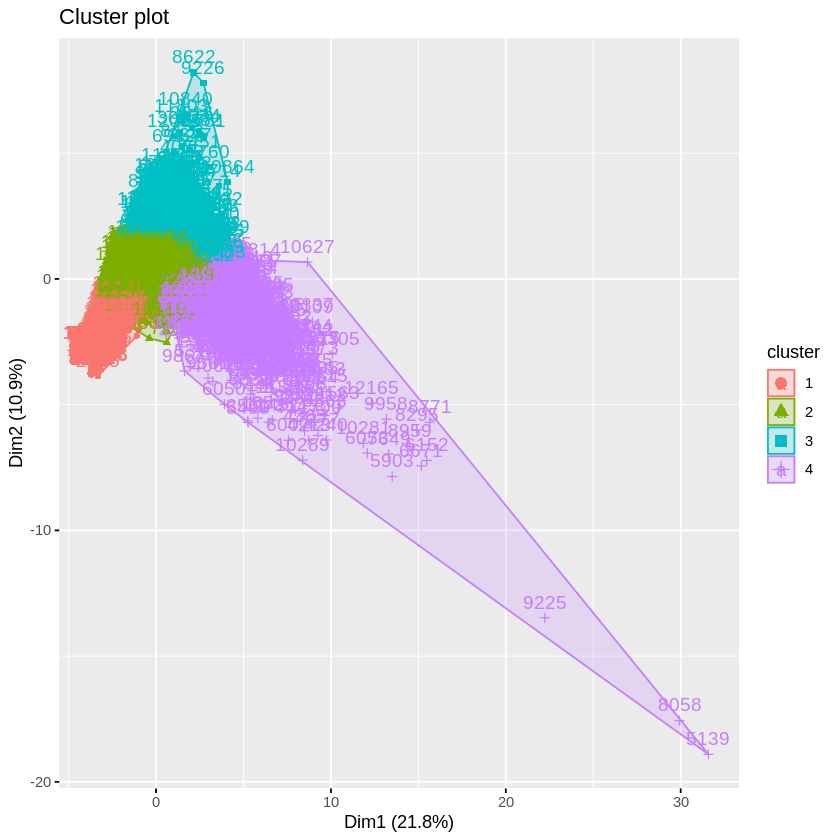

In [18]:
# using fviz_cluster to obtain an illustration of the clusters with k=4
table(data1[,17])
fviz_cluster(clustering, data)

The class which has blue color seems to be covered by other group. So clusters=4 might not be a good choice. Then I try clusters=3.

In [19]:
# clustering using K=3
k=3
clustering<-kmeans(data, centers=k,nstart=30)
data1<-cbind(data,clustering$cluster)
summary(data1)

 Administrative    Administrative_Duration Informational    
 Min.   :-0.6976   Min.   :-0.46311        Min.   :-0.3966  
 1st Qu.:-0.6976   1st Qu.:-0.45746        1st Qu.:-0.3966  
 Median :-0.3966   Median :-0.41222        Median :-0.3966  
 Mean   : 0.0000   Mean   : 0.00000        Mean   : 0.0000  
 3rd Qu.: 0.5063   3rd Qu.: 0.07121        3rd Qu.:-0.3966  
 Max.   : 7.4282   Max.   :18.75967        Max.   :18.4906  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2521        Min.   :-0.7139   Min.   :-0.6253        
 1st Qu.:-0.2450        1st Qu.:-0.5566   1st Qu.:-0.5281        
 Median :-0.2450        Median :-0.3094   Median :-0.3115        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2450        3rd Qu.: 0.1402   3rd Qu.: 0.1413        
 Max.   :17.8581        Max.   :15.1322   Max.   :32.7927        
  BounceRates        ExitRates         PageValues        SpecialDay    
 Min.   :-0.4574   Min.   :-0.8862   Mi


   1    2    3 
9590 1051 1675 

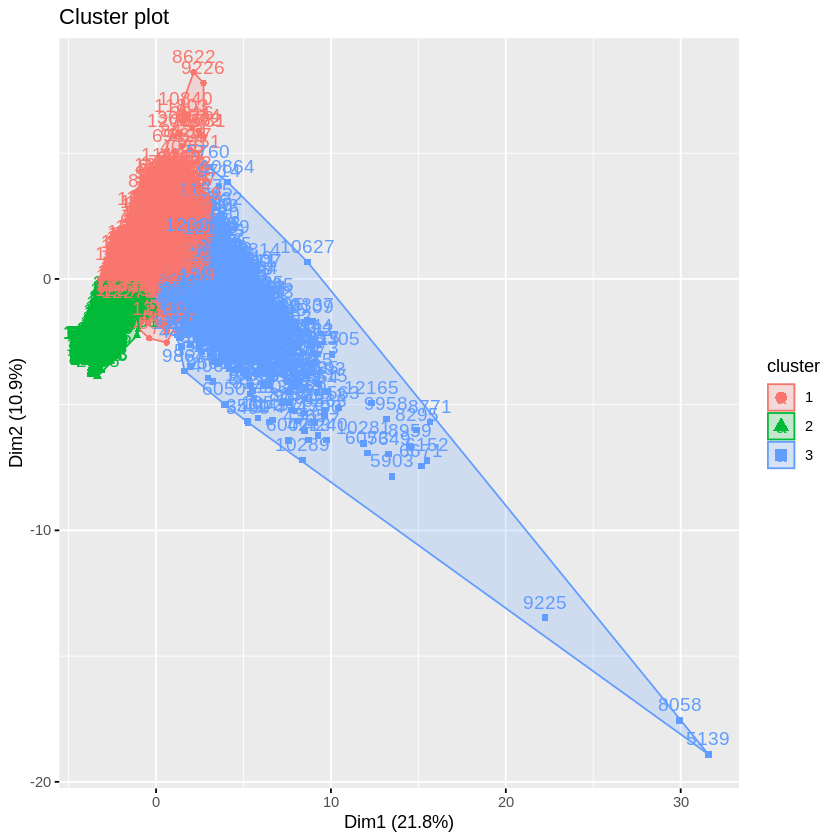

In [20]:
table(data1[,17])
fviz_cluster(clustering, data)

when I divide this data into 3 clusters, the 3 groups has clear boundaries so it is a suitable clustering method.

## Hierarchical Clustering

In [21]:
# Dissimilarity matrix
d <- dist(data, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

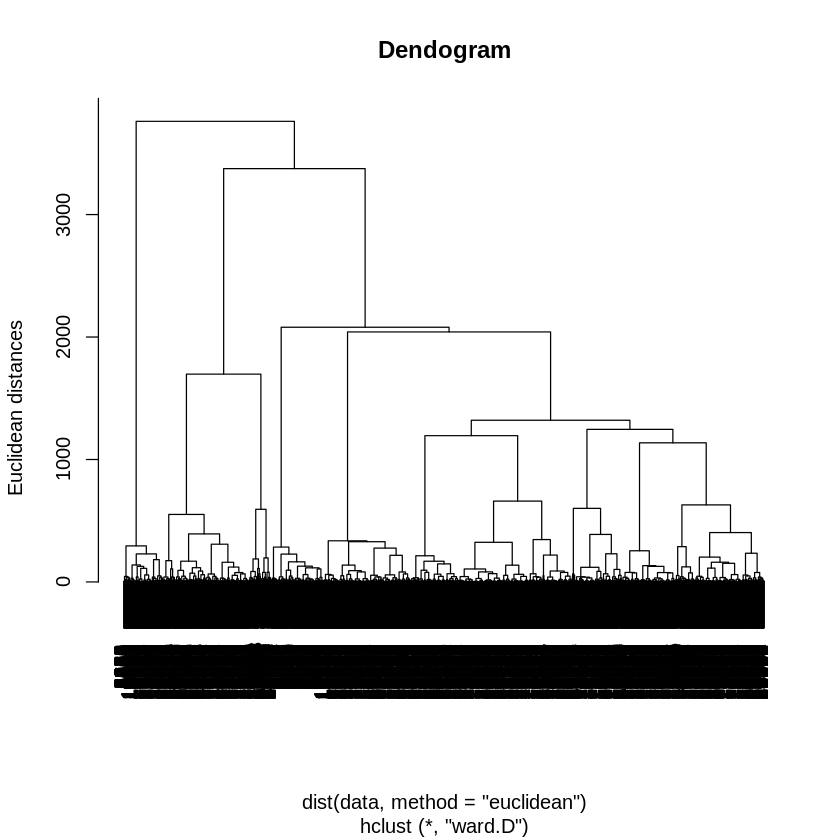

In [23]:
# converting hclust into a dendrogram and plotting the dendrogram
dendrogram = hclust(dist(data, method = 'euclidean'), method = 'ward.D')
plot(dendrogram,
     main = paste('Dendogram'),
     ylab = 'Euclidean distances')

From this dendrogram we can see that the optimal number of clusters is 3 and we can see that by counting the number of vertical lines in the largest vertical distance made without crossing any of the horizontal lines.

In [24]:
# fitting hierarchical clustering to the data set
hc = hclust(dist(data, method = 'euclidean'), method = 'ward.D')
y_hc = cutree(hc, 3)

In [25]:
# clusters assigned to each variable
y_hc

[1] 1 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2
   [37] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2
   [73] 2 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
  [109] 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1
  [145] 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2
  [181] 2 1 1 2 3 2 2 2 3 2 1 2 2 2 2 2 3 2 3 3 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2
  [217] 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 3 2 3 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2
  [253] 1 2 2 2 2 2 2 2 2 1 3 2 2 3 2 2 2 2 2 1 2 2 2 2 3 2 2 2 2 3 2 2 2 2 1 2
  [289] 2 2 2 2 2 1 3 3 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2
  [325] 2 2 2 2 2 2 1 2 2 2 3 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 3 1 2 2 1
  [361] 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 1 3 2 2 2 2 2 3 2 2 2 2 2
  [397] 2 2 1 3 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 1 2 2 1 2 2 3 2 1 2 2 1 2 2
  [433] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 2 2 2 2 2 2 2 2
  [469] 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 3
  [505] 2 2 2 2 2 2 3 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 3 2 2 2
  [541] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [577] 2 1 2 2 2 2 2 2 2 1 2 3 2 1 2 1 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 3 3 3
  [613] 3 2 3 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 1 2 2 3 2 2 2 2 2 3
  [649] 2 2 2 2 3 2 2 2 2 2 1 1 2 2 2 2 2 3 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 2
  [685] 2 2 2 2 2 3 2 2 2 2 3 3 2 3 2 2 2 2 3 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2
  [721] 1 2 3 2 1 2 2 1 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 1 2 2 2 2 2 2 3 2 3 2 2 2
  [757] 2 2 3 2 3 2 2 1 2 2 2 2 2 2 2 2 3 2 1 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2
  [793] 2 2 2 2 2 2 2 3 2 2 3 2 1 1 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 1 2 2 2 2 2
  [829] 2 2 2 1 2 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 3 2 2 2 2 3 2 2 2 2 3 2 2 2 2 3
  [865] 2 2 2 2 2 2 1 2 1 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 3 2 3 1 2 2
  [901] 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2
  [937] 2 2 2 3 2 2 1 2 2 1 2 1 2 2 2 2 2 2 3 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [973] 2 2 1 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 [1009] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 3 2 2 3 2 2 3 2 1 2 3 2 2 2 2 2 3 2
 [1045] 2 2 2 1 2 3 3 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2
 [1081] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2
 [1117] 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 2 2 2 2 2 2 2 2 2 1 2 2 3
 [1153] 2 2 2 3 2 2 2 2 2 2 2 1 1 3 1 2 2 3 1 2 2 2 1 2 3 3 2 3 2 2 3 2 2 2 2 2
 [1189] 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
 [1225] 2 2 2 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 1
 [1261] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 1 2 2 2 1 2 1 2 2 2 2 2 2 3 2 2 2
 [1297] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 3 2 1 2 2 3 2 2 2 1 3 2 2 2 2
 [1333] 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 1 2 2 2 2 2 3 1 2 2 1 2 3 2 2 2 3 2
 [1369] 2 2 2 2 2 2 2 1 2 2 2 2 2 2 3 1 1 2 2 2 1 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2
 [1405] 2 2 1 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 3 1 2 2 2 2 2 2 2 2 2
 [1441] 2 2 3 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2
 [1477] 2 2 2 2 3 3 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 3 2 3 3 2 2 1 3 2 1 3 2 2
 [1513] 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2
 [1549] 2 2 1 2 2 2 3 2 3 2 2 2 2 3 2 1 2 2 1 2 2 2 2 2 3 2 2 2 3 2 2 2 2 3 2 2
 [1585] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 [1621] 2 2 2 2 2 3 2 3 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2
 [1657] 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 2 2 2 2
 [1693] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 1 2 3 3 2 2 2 2 2
 [1729] 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2
 [1765] 3 1 2 3 2 2 2 3 2 2 2 2 3 3 2 2 2 2 2 2 2 1 3 2 2 2 2 2 2 2 1 2 2 2 2 2
 [18

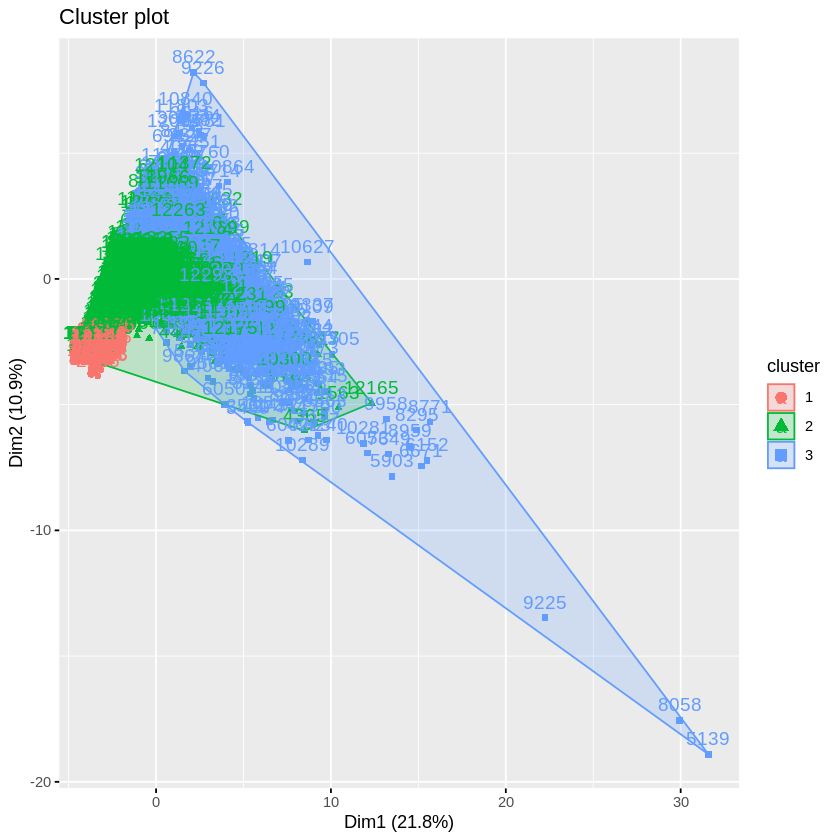

In [29]:
# plotting the clusters
fviz_cluster(list(data = data, cluster = y_hc))

# Comparing the two Approaches

- Kmeans clustering needed advance knowledge of the number of clusters one wants to divide the data and that's why we plotted the elbow curve while in hierarchical clustering  one can stop at any number of clusters, one finds appropriate by interpreting  the dendrogram. However it is a bit confusing trying to come up with an optimal number of clusters especially for a large dimensional data.
- The k-means algorithm is parameterized by the value k, which is the number of clusters that you want to create while hierarchical clustering builds clusters incrementally, producing a dendogram.
